# Loading and Cleaning the Data

In [ ]:
# importing pandas to do data analysis
import pandas as pd

# reading excel file (by default extracting the first sheet)
df = pd.read_excel('https://drive.google.com/uc?export=download&id=1poIGWFAlRwCpSVmCYYyv9eDrsEVMkFli')

# or in alternative
# df = pd.read_excel('inventory.xlsx')                                                               # if you have manually uploaded the file to colab
# df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Language4Water/data/inventory.xlsx')    # if you have stored the file is in your google drive

In [ ]:
print('shape:', df.shape)
print('columns:', df.columns)

shape: (84316, 19)
columns: Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Stock Quantity', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Simple SKU', 'Simple SKU.1', 'Enabled/Disabled',
       'Image? '],
      dtype='object')


In [ ]:
guessed_columns = [
  'category', 'quality', 'item_id', 'color', 'size',
  'description', 'color_long', '_', 'current_price', 
  'original_price', 'stock_quantity', 'interal_price', 
  '_', 'cost', '_', 'simple_sku', '_', 
  'enabled/disabled', 'image'
]

# overwriting column names
df.columns = guessed_columns

# removing unuseful columns
df.drop(columns=['_'], inplace=True)   # equivalent to `df = df.drop(columns=['_'])`

In [ ]:
df.sample(5)  # show 5 random rows

,category,quality,item_id,color,size,description,color_long,current_price,original_price,stock_quantity,interal_price,cost,simple_sku,enabled/disabled,image
44771,FL,AT100,MAFLMFK10001,BLK,XXL,TIKKER - MALE MICROFLEECE AT100,BLACK,9.99,29.99,4,11.50,8.90,MAFLMFK10001_BLK_XXL,Enabled,/t/i/tikker-maflmfk10001-blk-a_copy_1.jpg
4554,JK,TP75,FAJKSKI20006,BPR,M,STEPHY - FEMALE JKT TP75,BLACK PRINT,24.99,129.99,0,48.50,37.25,FAJKSKI20006_BPR_M,Enabled,/s/t/stephy_blackprint.jpg
67415,BT,Other,FABTSHA10005,COL,M,CLARA-POLYCOTTON ADV. SKORT,COOL BLUE,2.95,16.99,0,6.75,5.10,FABTSHA10005_COL_M,NaN,NaN
52041,TO,Other,MATOSWE20003,BLK,L,RANNOCH - MALE HOODY,BLACK,5.99,24.99,0,13.75,10.50,MATOSWE20003_BLK_L,NaN,NaN
6410,JK,Other,MAJKCAK20002,BLK,M,BANK - MALE PADDED JKT,BLACK,49.99,119.99,0,47.50,36.50,MAJKCAK20002_BLK_M,Enabled,/b/a/bank-majkcak20002-blk-a_copy_6.jpg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84316 entries, 0 to 84315
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          84316 non-null  object 
 1   quality           84133 non-null  object 
 2   item_id           84316 non-null  object 
 3   color             84316 non-null  object 
 4   size              84313 non-null  object 
 5   description       84316 non-null  object 
 6   color_long        84273 non-null  object 
 7   current_price     84316 non-null  float64
 8   original_price    84316 non-null  float64
 9   stock_quantity    84316 non-null  int64  
 10  interal_price     84316 non-null  float64
 11  cost              84316 non-null  float64
 12  simple_sku        84316 non-null  object 
 13  enabled/disabled  36572 non-null  object 
 14  image             34920 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 9.6+ MB


# Problem
get all items with low stock quantity (<5 units)

In [ ]:
# defining a mask (collection of True/False) to define our condiciton
has_low_stock = df['stock_quantity'] < 5

# using the mask to filter the dataset into the subset we are interested in
low_stock_df = df[has_low_stock]

# displaying the result
low_stock_df

,category,quality,item_id,color,size,description,color_long,current_price,original_price,stock_quantity,interal_price,cost,simple_sku,enabled/disabled,image
0,JK,DLX,MAJKSKM20003,BLK,XL,DAWES - MALE DLX SKI JKT,BLACK,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLK_XL,NaN,NaN
1,JK,DLX,MAJKSKM20003,BLK,XXL,DAWES - MALE DLX SKI JKT,BLACK,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLK_XXL,NaN,NaN
2,JK,DLX,MAJKSKM20003,BLU,M,DAWES - MALE DLX SKI JKT,BLUE,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLU_M,NaN,NaN
3,JK,DLX,MAJKSKM20003,BLU,XL,DAWES - MALE DLX SKI JKT,BLUE,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLU_XL,NaN,NaN
4,JK,DLX,MAJKSKM20003,BLU,XXL,DAWES - MALE DLX SKI JKT,BLUE,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLU_XXL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84302,AC,Other,UUACMIH10018,WHT,M,MON / BLU PRT ON WHT - CARRIER BAG M,WHITE,0.01,0.01,0,0.00,0.06,UUACMIH10018_WHT_M,NaN,NaN
84304,AC,Other,UUACMIH10024,BRN,EACH,44CM NEW CURVED HANGER WITH RIBBING BAR,BROWN,0.01,0.01,0,0.50,0.42,UUACMIH10024_BRN_EACH,NaN,NaN
84305,AC,Other,UUACMIA20483,ASS,EACH,HANGERS - WITH LOGO,ASSORTED,0.01,0.01,0,0.25,0.20,UUACMIA20483_ASS_EACH,NaN,NaN
84312,AC,Other,UUACMII30015,BLK,EACH,QIKPAC STAND (METAL),BLACK,0.00,0.00,0,260.00,200.00,UUACMII30015_BLK_EACH,NaN,NaN


In [ ]:
low_stock_df

,category,quality,item_id,color,size,description,color_long,current_price,original_price,stock_quantity,interal_price,cost,simple_sku,enabled/disabled,image
0,JK,DLX,MAJKSKM20003,BLK,XL,DAWES - MALE DLX SKI JKT,BLACK,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLK_XL,NaN,NaN
1,JK,DLX,MAJKSKM20003,BLK,XXL,DAWES - MALE DLX SKI JKT,BLACK,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLK_XXL,NaN,NaN
2,JK,DLX,MAJKSKM20003,BLU,M,DAWES - MALE DLX SKI JKT,BLUE,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLU_M,NaN,NaN
3,JK,DLX,MAJKSKM20003,BLU,XL,DAWES - MALE DLX SKI JKT,BLUE,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLU_XL,NaN,NaN
4,JK,DLX,MAJKSKM20003,BLU,XXL,DAWES - MALE DLX SKI JKT,BLUE,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLU_XXL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84302,AC,Other,UUACMIH10018,WHT,M,MON / BLU PRT ON WHT - CARRIER BAG M,WHITE,0.01,0.01,0,0.00,0.06,UUACMIH10018_WHT_M,NaN,NaN
84304,AC,Other,UUACMIH10024,BRN,EACH,44CM NEW CURVED HANGER WITH RIBBING BAR,BROWN,0.01,0.01,0,0.50,0.42,UUACMIH10024_BRN_EACH,NaN,NaN
84305,AC,Other,UUACMIA20483,ASS,EACH,HANGERS - WITH LOGO,ASSORTED,0.01,0.01,0,0.25,0.20,UUACMIA20483_ASS_EACH,NaN,NaN
84312,AC,Other,UUACMII30015,BLK,EACH,QIKPAC STAND (METAL),BLACK,0.00,0.00,0,260.00,200.00,UUACMII30015_BLK_EACH,NaN,NaN


# Adding a calculated column

In [ ]:
df['stock_value'] = df['stock_quantity'] * df['cost'] 


# for more complicated functions, you can define your own function as below
def stock_value(row):
  return row.stock_quantity * row.cost

df['stock_value'] =  df.apply(stock_value, axis=1)

df.sample(5)  # showing 5 random rows

,category,quality,item_id,color,size,description,color_long,current_price,original_price,stock_quantity,interal_price,cost,simple_sku,enabled/disabled,image,stock_value
64550,BT,Other,FABTTQD10002,PAL,S,SAHARA - FEMALE 3/4 TRS,PRALINE,5.29,17.99,0,10.25,7.80,FABTTQD10002_PAL_S,NaN,NaN,0.0
79618,TO,Other,FATOTSD10004,PEB,M,NATIVE - FEMALE VN TSHIRT,PEBBLES,4.95,9.99,0,6.00,4.55,FATOTSD10004_PEB_M,NaN,NaN,0.0
27226,JK,TP75,UAJKRAI10001,COB,XXXL,QIKPAC JACKET - UNISEX PACKAWAY JKT TP75,COBALT,25.99,51.99,0,20.00,15.35,UAJKRAI10001_COB_XXXL,NaN,NaN,0.0
66470,BT,Other,FCBTSHI10002,WHT,2017-10-09 00:00:00,DREAMKID - FEMALE SHORTS,WHITE,4.99,16.99,0,7.25,5.55,FCBTSHI10002_WHT_43017,NaN,NaN,0.0
11756,AC,Other,UUACMIK10012,TST,EACH,GLENTILT - RECLINING CHAIR,TROPICAL STRIPE,39.99,89.99,10,42.75,32.95,UUACMIK10012_TST_EACH,Enabled,/g/l/glentilt-uuacmik10012-tst-a_copy_1.jpg,329.5


In [ ]:
# taking only the "enabled ones"
is_enabled = low_stock_df['enabled/disabled'] == 'Enabled'
low_stock_df = low_stock_df[is_enabled]  # overwriting the previous dataframe with an even smaller one

Want to save the subset back to an excel file?

`low_stock_df.to_excel("subset_inventory.xlsx")`  
[full docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html)

# Exploring & Visualising the Data

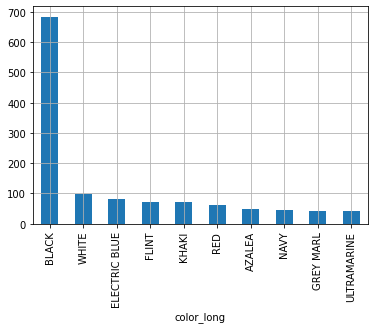

In [ ]:
# what's the most left-over color?
remaining_colors = low_stock_df.groupby('color_long')['stock_quantity'].sum()
top_remaining_colors = remaining_colors.sort_values(ascending=False).iloc[:10]
top_remaining_colors.plot.bar(grid=True)

In [ ]:
low_stock_df.color_long.value_counts()  # counting the rows for each color

BLACK              3982
WHITE              1146
FLINT               522
RED                 498
GRANITE             421
                   ... 
SKULL PRINT           1
FIRE CAMO             1
SMOKY BLUE            1
HOT PINK FLORAL       1
PESTO                 1
Name: color_long, Length: 693, dtype: int64

In [ ]:
low_stock_df.item_id.value_counts()  # counting the duplicated ids

FAFLMFG20003    86
MAFLFLC20004    58
MAFLMFC10002    53
MYTOLSA20002    49
FAFLMFG20002    46
                ..
UUACSLB20002     1
UASOCAD20002     1
UUACMIE30018     1
FATOTSK10009     1
FYJKRAF20001     1
Name: item_id, Length: 2760, dtype: int64

# What else can we do?
- make an interactive app
- group sizes before counting
- plot some more statistics
- equivalent of vlookup (merge)


In [ ]:
# taking just the first 10 rows
# `copy` is to avoid the "trying to be set on a copy of a slice from a DataFrame" warning
_df = low_stock_df.iloc[:10].copy()

# overwriting the image column with urls to random images
_df['image'] = [f"https://picsum.photos/seed/{i}/200/300" for i in _df['simple_sku']]
_df

,category,quality,item_id,color,size,description,color_long,current_price,original_price,stock_quantity,interal_price,cost,simple_sku,enabled/disabled,image
65,JK,DLX,MAJKDOL20001,KHA,S,HIGHLAND - MALE DLX DOWN JKT,KHAKI,124.99,249.99,0,97.75,75.2,MAJKDOL20001_KHA_S,Enabled,https://picsum.photos/seed/MAJKDOL20001_KHA_S/...
66,JK,DLX,MAJKDOL20001,KHA,XXS,HIGHLAND - MALE DLX DOWN JKT,KHAKI,124.99,249.99,0,97.75,75.2,MAJKDOL20001_KHA_XXS,Enabled,https://picsum.photos/seed/MAJKDOL20001_KHA_XX...
67,JK,DLX,MAJKSKL20006,BBL,S,ICON - MALE DLX JKT,BRIGHT BLUE,124.99,249.99,0,92.25,70.9,MAJKSKL20006_BBL_S,Enabled,https://picsum.photos/seed/MAJKSKL20006_BBL_S/...
68,JK,DLX,MAJKSKL20006,BLK,S,ICON - MALE DLX JKT,BLACK,124.99,249.99,1,92.25,70.9,MAJKSKL20006_BLK_S,Enabled,https://picsum.photos/seed/MAJKSKL20006_BLK_S/...
69,JK,DLX,MAJKSKL20006,BLK,XXS,ICON - MALE DLX JKT,BLACK,124.99,249.99,0,92.25,70.9,MAJKSKL20006_BLK_XXS,Enabled,https://picsum.photos/seed/MAJKSKL20006_BLK_XX...
73,JK,DLX,MAJKSKL20006,WHT,L,ICON - MALE DLX JKT,WHITE,124.99,249.99,0,92.25,70.9,MAJKSKL20006_WHT_L,Enabled,https://picsum.photos/seed/MAJKSKL20006_WHT_L/...
74,JK,DLX,MAJKSKL20006,WHT,S,ICON - MALE DLX JKT,WHITE,124.99,249.99,0,92.25,70.9,MAJKSKL20006_WHT_S,Enabled,https://picsum.photos/seed/MAJKSKL20006_WHT_S/...
77,JK,DLX,MAJKSKK20030,RED,XXS,COMMANDS - MALE DLX JKT,RED,114.99,249.99,0,78.50,60.3,MAJKSKK20030_RED_XXS,Enabled,https://picsum.photos/seed/MAJKSKK20030_RED_XX...
78,JK,DLX,MAJKSKK20030,WHT,L,COMMANDS - MALE DLX JKT,WHITE,114.99,249.99,0,78.50,60.3,MAJKSKK20030_WHT_L,Enabled,https://picsum.photos/seed/MAJKSKK20030_WHT_L/...
79,JK,DLX,MAJKSKK20030,WHT,XS,COMMANDS - MALE DLX JKT,WHITE,114.99,249.99,0,78.50,60.3,MAJKSKK20030_WHT_XS,Enabled,https://picsum.photos/seed/MAJKSKK20030_WHT_XS...


In [ ]:
# showing the first row
row = _df.iloc[0]
row

category                                                           JK
quality                                                           DLX
item_id                                                  MAJKDOL20001
color                                                             KHA
size                                                                S
description                              HIGHLAND - MALE DLX DOWN JKT
color_long                                                      KHAKI
current_price                                                  124.99
original_price                                                 249.99
stock_quantity                                                      0
interal_price                                                   97.75
cost                                                             75.2
simple_sku                                         MAJKDOL20001_KHA_S
enabled/disabled                                              Enabled
image               

In [ ]:
# creating a html image snippet using the row's image url
f'<img src="{row.image}"></img>'

'<img src="https://picsum.photos/seed/MAJKDOL20001_KHA_S/200/300"></img>'

In [ ]:
import ipywidgets as widgets

# using ipywidgets to show the image
widgets.HTML('<img src="{row.image}"></img>')

HTML(value='<img src="{row.image}"></img>')

In [ ]:
# creating a Label widget and filling it with some extra information from the row
widgets.Label(f"{row.simple_sku}: {row.description} (qty={row.stock_quantity})")

Label(value='MAJKDOL20001_KHA_S: HIGHLAND - MALE DLX DOWN JKT (qty=0)')

In [ ]:
# combining all widgets in a HBox (horizontal box) widget
widgets.HBox([
  widgets.HTML(f'<img src="{row.image}"></img>'),
  widgets.Label(f"{row.simple_sku}: {row.description} (qty={row.stock_quantity})"),
  widgets.Text(placeholder='quantity to order'),
  widgets.Textarea(placeholder='comment'),
])

In [ ]:
# As we want to do that for all rows in the dataframe, we are better off
# creating a function that takes in a row and returns a HBox widget
def create_row_widget(row):
  return widgets.HBox([
    widgets.HTML(f'<img src="{row.image}"></img>'),
    widgets.HTML(f"<b>{row.simple_sku}:</b><br><p>{row.description} (qty={row.stock_quantity})</p>"),
    widgets.Text(placeholder='quantity to order'),
    widgets.Textarea(placeholder='comment'),
  ])

In [ ]:
# now we can loop over each row using the `iterrows` method, storing each 
# HBox widget in a list that we pass to a parent VBox widget
row_widgets = []
for _, row in _df.iterrows():
  row_widget = create_row_widget(row)
  row_widgets.append(row_widget)

widgets.VBox(row_widgets)

# Data Manipulation

In [37]:
import pandas as pd

In [38]:
# loading the data (might take some time)
df = pd.read_excel('https://drive.google.com/uc?export=download&id=1poIGWFAlRwCpSVmCYYyv9eDrsEVMkFli')

# overwriting column names
guessed_columns = [
  'category', 'quality', 'item_id', 'color', 'size',
  'description', 'color_long', '_', 'current_price', 
  'original_price', 'stock_quantity', 'interal_price', 
  '_', 'cost', '_', 'simple_sku', '_', 
  'enabled/disabled', 'image'
]
df.columns = guessed_columns

# removing unuseful columns
df.drop(columns=['_'], inplace=True)   # equivalent to `df = df.drop(columns=['_'])`

In [39]:
df

,category,quality,item_id,color,size,description,color_long,current_price,original_price,stock_quantity,interal_price,cost,simple_sku,enabled/disabled,image
0,JK,DLX,MAJKSKM20003,BLK,XL,DAWES - MALE DLX SKI JKT,BLACK,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLK_XL,NaN,NaN
1,JK,DLX,MAJKSKM20003,BLK,XXL,DAWES - MALE DLX SKI JKT,BLACK,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLK_XXL,NaN,NaN
2,JK,DLX,MAJKSKM20003,BLU,M,DAWES - MALE DLX SKI JKT,BLUE,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLU_M,NaN,NaN
3,JK,DLX,MAJKSKM20003,BLU,XL,DAWES - MALE DLX SKI JKT,BLUE,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLU_XL,NaN,NaN
4,JK,DLX,MAJKSKM20003,BLU,XXL,DAWES - MALE DLX SKI JKT,BLUE,329.99,329.99,0,111.75,85.90,MAJKSKM20003_BLU_XXL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84311,AC,Other,UUACMII30019,NOA,EACH,QIKPAC STAND 2012 (CARD),NOT APPLICABLE,0.00,0.00,155,0.00,0.00,UUACMII30019_NOA_EACH,NaN,NaN
84312,AC,Other,UUACMII30015,BLK,EACH,QIKPAC STAND (METAL),BLACK,0.00,0.00,0,260.00,200.00,UUACMII30015_BLK_EACH,NaN,NaN
84313,AC,Other,UUACMIJ30012,BLU,EACH,FOAMCUBE - IN STORE SEAT,BLUE,0.00,0.00,151,37.75,28.95,UUACMIJ30012_BLU_EACH,NaN,NaN
84314,AC,Other,UUACMIH10026,BLK,EACH,HANGERS - KIDS PLASTIC HANGER,BLACK,0.00,0.00,1,0.25,0.10,UUACMIH10026_BLK_EACH,NaN,NaN


In [42]:
# keeping only active items
mask = df['enabled/disabled'] == "Enabled"
df = df[mask]

# removing sentitive and useless columns
df = df.drop(columns=['cost', 'description', 'original_price', 'interal_price', 'simple_sku', 'enabled/disabled', 'color', 'quality'])

# renaming only remaning price
df = df.rename(columns={'current_price': 'price'})

# anonymizing item_id
df['item_id'] = df['item_id'].apply(hash)

# defining random images (same for same item_id)
def create_image_url(x):
    return f"https://picsum.photos/seed/{x}/200/300"
df['image'] = df.item_id.apply(create_image_url)

# removing duplicated lines
df = df.drop_duplicates()

# sort by 
df = df.sort_values(['item_id', 'color_long', 'size'])

In [43]:
df

,category,item_id,size,color_long,price,stock_quantity,image
63736,AC,-9213298248831012839,EACH,GHOST,9.45,0,https://picsum.photos/seed/-921329824883101283...
65282,AC,-9213298248831012839,EACH,GRAPHITE,7.95,0,https://picsum.photos/seed/-921329824883101283...
56685,TO,-9211817735500164205,L,GREENMIST,5.99,0,https://picsum.photos/seed/-921181773550016420...
54883,TO,-9211817735500164205,M,GREENMIST,5.99,0,https://picsum.photos/seed/-921181773550016420...
54831,TO,-9211817735500164205,S,GREENMIST,5.99,0,https://picsum.photos/seed/-921181773550016420...
...,...,...,...,...,...,...,...
8175,JK,9215932086447884098,XXL,WHITE,44.99,0,https://picsum.photos/seed/9215932086447884098...
64775,TO,9217040347282789404,XS,HIBISCUS,8.99,0,https://picsum.photos/seed/9217040347282789404...
64776,TO,9217040347282789404,XXS,HIBISCUS,8.99,0,https://picsum.photos/seed/9217040347282789404...
64236,TO,9217040347282789404,XS,MARZIPAN,8.99,0,https://picsum.photos/seed/9217040347282789404...


In [44]:
df.to_csv('dataset.csv', index=False)

# Working with filepaths and dates

In [28]:
import pandas as pd
import os

df = pd.DataFrame({'a': [1,2,3]})
df

,a
0,1
1,2
2,3


In [32]:
now_str = pd.Timestamp("now").strftime("%Y%m%d_%H%M")

folder = './my_folder'
filename = f"mydata_{now_str}.csv"
fp = os.path.join(folder, fname)


df.to_csv(fp)